In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    # 分别计算偶数项和奇数项
    even = fft(x[::2])
    odd = fft(x[1::2])
    # 计算g_k
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]

def ifft(X):
    N = len(X)
    if N <= 1:
        return X
    # 分别计算偶数项和奇数项
    even = ifft(X[::2])
    odd = ifft(X[1::2])
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [(even[k] + T[k]) for k in range(N // 2)] + [(even[k] - T[k]) for k in range(N // 2)]

# 测试FFT和逆FFT
x = [0, 1, 2, 3, 4, 5, 6, 7]
X = fft(x)
y = ifft(X)
print("原始序列:", x)
print("FFT结果:", X)
print("逆FFT结果:", y, [i.real for i in y])


原始序列: [0, 1, 2, 3, 4, 5, 6, 7]
FFT结果: [(3.5+0j), (-0.5+1.2071067811865475j), (-0.5+0.5j), (-0.5+0.20710678118654746j), (-0.5+0j), (-0.49999999999999994-0.20710678118654746j), (-0.49999999999999994-0.5j), (-0.49999999999999983-1.2071067811865475j)]
逆FFT结果: [(2.220446049250313e-16+0j), (1.0000000000000002+2.2776579365114115e-16j), (2-9.957992501029599e-17j), (3+2.1632341619892146e-16j), (4+0j), (5-2.1632341619892146e-16j), (6+9.957992501029599e-17j), (7-2.2776579365114115e-16j)] [2.220446049250313e-16, 1.0000000000000002, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


In [9]:
class FFT_Visualization:
    def __init__(self, fun, size):
        ''' 
        fun: 输入一个函数
        size: 规模，也就是n
        '''
        self.size =size
        self.fun = fun
        self.variable_values = np.linspace(0, 1, self.size, endpoint=False)
        self.func_values = [self.fun(x) for x in self.variable_values]
        # 这俩用于后面存储fft和ifft的结果
        self.F = None
        self.iF = None
        self.absolute_errors = None
        self.filtered_F = None
        self.filtered_iF = None
        
        
    def plot_func(self):
        ''' 
        本函数主要用于可视化实例函数
        '''        
        plt.figure(figsize=(12, 6))
        plt.plot(self.variable_values, self.func_values, label='$f(t)$', color='blue')
        plt.title(f'n = {self.size}')
        plt.xlabel('t')
        plt.ylabel('f(t)')
        plt.legend()
        plt.show()
        
    def calc_fft(self):
        def fft(x):
            N = len(x)
            if N <= 1:
                return x
            # 分别计算偶数项和奇数项
            even = fft(x[::2])
            odd = fft(x[1::2])
            # 计算g_k
            T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
            return [(even[k] + T[k]) / 2 for k in range(N // 2)] + [(even[k] - T[k]) / 2 for k in range(N // 2)]
        
        self.F = fft(self.func_values)
        
    def fft_plot(self):
        if self.F is None:
            self.calc_fft()
        
        print("G's sequence:")
        print([(np.real(num), np.imag(num)) for num in self.F])
        
        # 创建一个图像，只包含三维图像
        fig1 = plt.figure(figsize=(12, 12))
        ax1 = fig1.add_subplot(111, projection='3d')
        ax1.plot(range(len(self.F)), np.real(self.F), np.imag(self.F), label='Complex Sequence', color='green')
        ax1.plot(range(len(self.F)), np.real(self.F), np.zeros_like(self.F), label='Real Projection', color='blue')
        ax1.plot(range(len(self.F)), np.zeros_like(self.F), np.imag(self.F), label='Imaginary Projection', color='red')
        ax1.set_title('FFT of f(t)$ (n = {}) - 3D Plot'.format(self.size))
        ax1.set_xlabel('Index')
        ax1.set_ylabel('Real Part')
        ax1.set_zlabel('Imaginary Part')
        ax1.legend()
        plt.show()

        # 创建一个图像，只包含基本图像
        fig2 = plt.figure(figsize=(12, 9))
        
        plt.subplot(3, 1, 1)
        plt.plot(np.abs(self.F), label='Absolute', color='blue')
        plt.title('FFT of $f(t)$ (n = {}) - Absolute '.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Real Part')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(np.real(self.F), label='Real', color='blue')
        plt.title('FFT of $f(t)$ (n = {}) - Real Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Real Part')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(np.imag(self.F), label='Imaginary', color='red')
        plt.title('FFT of $f(t)$ (n = {}) - Imaginary Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Imaginary Part')
        plt.legend()

        plt.tight_layout()
        plt.show()
    

    def calc_ifft(self):
        def ifft(X):
            N = len(X)
            if N <= 1:
                return X
            # 分别计算偶数项和奇数项
            even = ifft(X[::2])
            odd = ifft(X[1::2])
            T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
            return [(even[k] + T[k]) for k in range(N // 2)] + [(even[k] - T[k]) for k in range(N // 2)]
        
        if not self.F:
            self.calc_fft()
            
        self.iF = ifft(self.F)
        
    def ifft_plot(self):
        if not self.iF:
            self.calc_ifft()
            
        # 绘制逆 FFT 结果的实部和虚部
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(np.real(self.iF), label='Real', color='blue')
        plt.title('IFFT of FFT of $f(t)$ (n = {}) - Real Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Real Part')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(np.imag(self.iF), label='Imaginary', color='red')
        plt.title('IFFT of FFT of $f(t)$ (n = {}) - Imaginary Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Imaginary Part')
        plt.legend()

        plt.tight_layout()
        plt.show()
        
        
    def calc_error(self):
        '''计算逆 FFT 结果和原始函数之间的误差'''
        if not self.iF:
            print("Please perform inverse FFT first.")
            return

        func_values_ifft = np.real(self.iF)

        # 计算绝对误差
        self.absolute_errors = [abs((self.func_values[i] - func_values_ifft[i])) for i in range(self.size)]

    def plot_errors(self, tolerance=1e-6):
        '''
        绘制误差随着索引的变化
        '''
        if not self.absolute_errors:
            self.calc_error()
            
        max_error = np.max(self.absolute_errors)
        print(f'max absolute error: {max_error}')
        if max_error < tolerance:
            print("Inverse FFT result is close to original function.")
        else:
            print("Inverse FFT result is not close to original function.")

        # 绘制误差图像
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.size), self.absolute_errors, color='blue', label='Absolute Error')
        plt.axhline(y=tolerance, color='red', linestyle='--', label='Tolerance')
        plt.title('Errors of Inverse FFT Result')
        plt.xlabel('Index')
        plt.ylabel('Absolute Error')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def low_pass_filter(self, ratio=0.25):
        """
        对频域信号进行低频滤波，保留前 ratio 比例的频率分量，其余置零。
        """
        if not self.F:
            self.calc_fft()

        num_freq_components = len(self.F)
        num_components_to_keep = int(ratio * num_freq_components)

        self.filtered_F = np.zeros_like(self.F)
        self.filtered_F[:num_components_to_keep] = self.F[:num_components_to_keep]

        # return filtered_F
    
    def low_pass_filter_and_plot(self, ratio=0.25):
        """
        对频域信号进行低频滤波并绘制滤波后的结果。
        """
        self.low_pass_filter(ratio)

        # 绘制 FFT 结果的实部和虚部
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(np.real(self.filtered_F), label='Real', color='blue')
        plt.title('Filtered FFT of $f(t)$ (n = {}) - Real Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Real Part')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(np.imag(self.filtered_F), label='Imaginary', color='red')
        plt.title('Filtered FFT of $f(t)$ (n = {}) - Imaginary Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Imaginary Part')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def filter_ifft(self):
        """
        计算滤波后的逆 FFT。
        """
        if self.filtered_F is None:
            self.low_pass_filter()
            print("Please perform low-pass filtering first.")
            
        def ifft(X):
            N = len(X)
            if N <= 1:
                return X
            # 分别计算偶数项和奇数项
            even = ifft(X[::2])
            odd = ifft(X[1::2])
            T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
            return [(even[k] + T[k]) for k in range(N // 2)] + [(even[k] - T[k]) for k in range(N // 2)]
        
        self.filtered_iF = ifft(self.filtered_F)
        
    def plot_filtered_ifft(self):
        """
        绘制滤波后的逆 FFT 结果的实部和虚部。
        """
        if self.filtered_iF is None:
            self.filter_ifft()
            
        # 绘制逆 FFT 结果的实部和虚部
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(np.real(self.filtered_iF), label='Real', color='blue')
        plt.title('Filtered IFFT of Filtered FFT of $f(t)$ (n = {}) - Real Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Real Part')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(np.imag(self.filtered_iF), label='Imaginary', color='red')
        plt.title('Filtered IFFT of Filtered FFT of $f(t)$ (n = {}) - Imaginary Part'.format(self.size))
        plt.xlabel('Index')
        plt.ylabel('Imaginary Part')
        plt.legend()

        plt.tight_layout()
        plt.show()
        
    def plot_all(self):
        ''' 
        这是一个直接绘制上述所有图像的函数
        '''
        pass


def visualize_all(fft_vis):
    """
    将所有可视化集成到一个函数中，并使用一个图像的子图将其打印出来。
    """
    plt.figure(figsize=(15, 20))

    plt.subplot(6, 1, 1)
    fft_vis.plot_func()

    plt.subplot(3, 2, 2)
    fft_vis.fft_plot()

    plt.subplot(3, 2, 3)
    fft_vis.ifft_plot()

    plt.subplot(3, 2, 4)
    fft_vis.plot_errors()

    plt.subplot(3, 2, 5)
    fft_vis.low_pass_filter_and_plot()

    plt.subplot(3, 2, 6)
    fft_vis.plot_filtered_ifft()

    plt.tight_layout()
    plt.show()
    
    

In [10]:
# 这里先将函数在不同点处的函数值记录下来，并使用折线图将其可视化

# 定义函数 f1(t) 和 f2(t)

def f1(t):
    return 0.7 * np.sin(2 * np.pi * 2 * t) + np.sin(2 * np.pi * 5 * t)

def f2(t):
    random = np.random.random()
    # print(random)
    return f1(t) + 0.3 * random

n1 = 2 ** 4
n2 = 2 ** 7

funcs = [f1, f2]
ns = [n1, n2]


# F1 = FFT_Visualization(f1, n1)
# F1.plot_func()
# F1.fft_plot()
# F1.ifft_plot()
# F1.plot_errors()
# F1.low_pass_filter_and_plot()
# F1.plot_filtered_ifft()

In [11]:
# 初步创建对应实例，然后使用上述定义的方法进行计算即可视化
F11 = FFT_Visualization(f1, n1)
F12 = FFT_Visualization(f1, n2)
F21 = FFT_Visualization(f2, n1)
F22 = FFT_Visualization(f2, n2)

F_instances = [F11, F12, F21, F22]

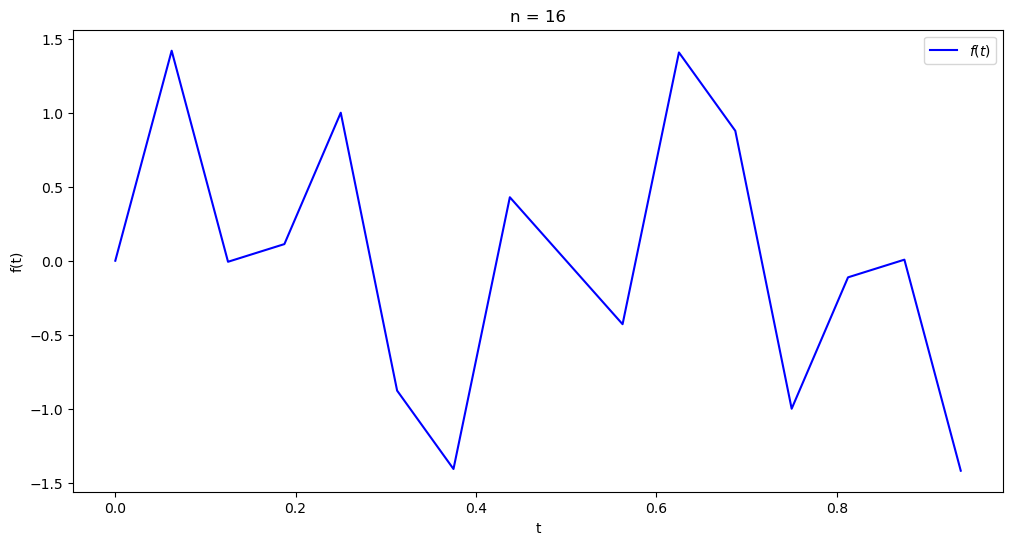

G's sequence:
[(-1.528566885207725e-16, 0.0), (4.4923612769336096e-17, 1.0607355844918418e-17), (1.2153693932024152e-16, -0.3500000000000001), (7.581370698702926e-17, 1.3877787807814457e-16), (-2.0102263481347252e-19, 1.1102230246251565e-16), (-2.697006910268047e-16, -0.5), (-5.255004555079618e-17, -8.326672684688674e-17), (1.231553076667411e-16, -2.0292841752753525e-16), (3.1898809694491904e-16, 0.0), (1.0956439556777732e-16, 2.391928246957418e-16), (-7.275208998916087e-17, 1.1102230246251565e-16), (-3.6827550286303336e-16, 0.5000000000000001), (-2.0102263481345894e-19, -1.1102230246251565e-16), (3.5610640745113326e-17, -1.942890293094024e-16), (5.847225691171948e-17, 0.3500000000000001), (2.8472106307317376e-17, -4.687176301312498e-17)]


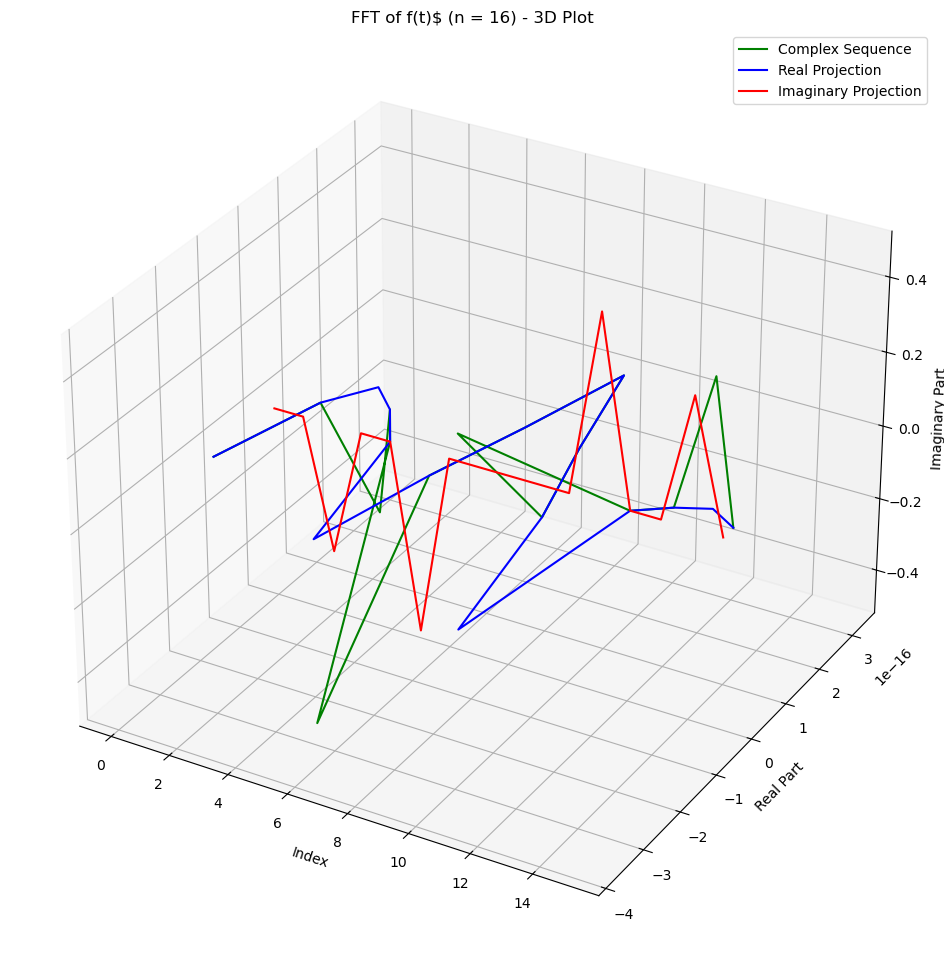

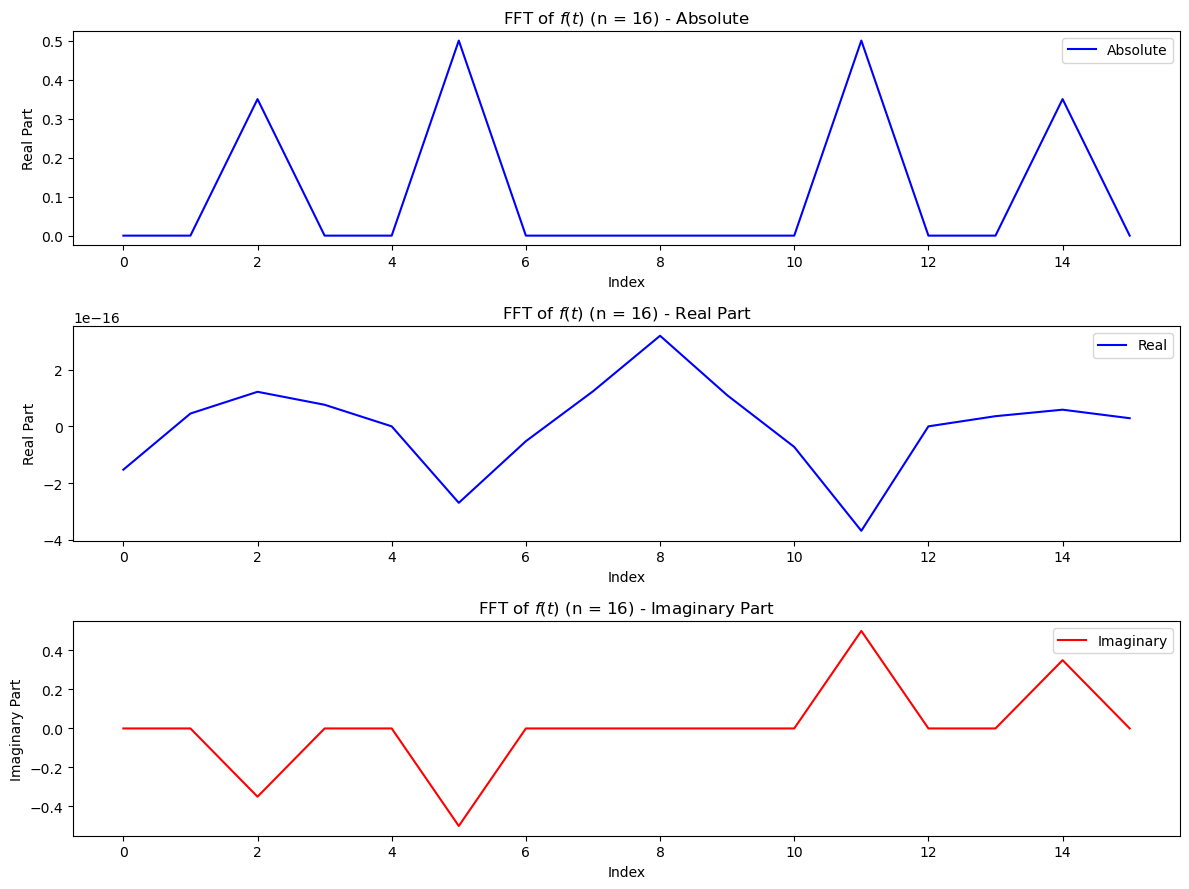

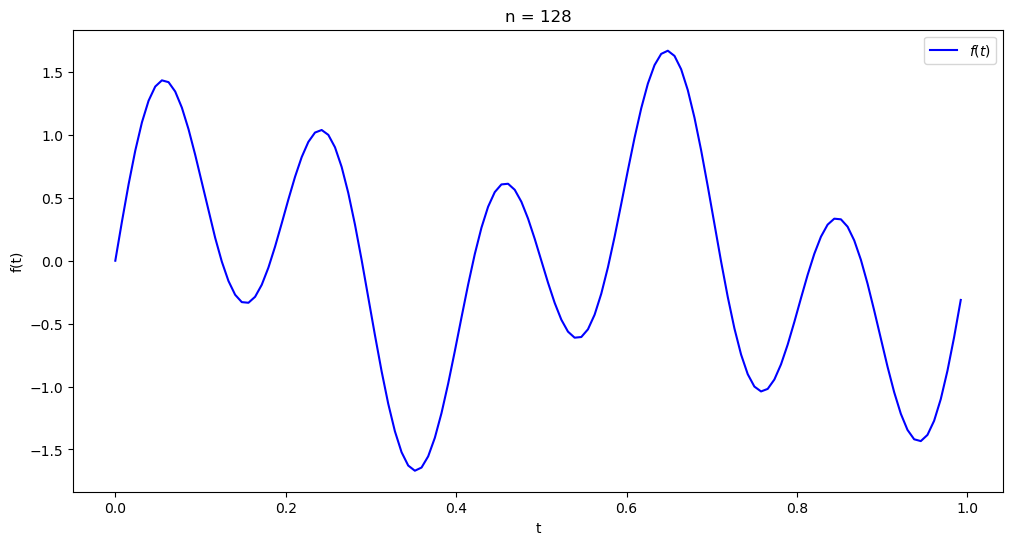

G's sequence:
[(9.949532157514958e-18, 0.0), (4.601980869880975e-18, 2.3418705034985552e-17), (-1.950235210450595e-17, -0.35), (1.9968049694826716e-17, 3.3638073057413804e-17), (1.1167033393611455e-17, 4.676656391468066e-17), (-2.5228774435142826e-16, -0.5), (1.9709853079631274e-17, -1.1231636059945302e-16), (3.138737128781949e-17, -5.4780509765624495e-17), (1.673585394874175e-17, -7.115603819335133e-17), (1.0021195745353326e-17, -2.0613896445915367e-17), (2.4946033212334356e-17, -4.4503884233702654e-17), (3.479291123655901e-17, -1.725988739832766e-17), (5.147510564197793e-17, -5.4701128372978056e-17), (-1.3125553940195526e-17, 5.5058557231671825e-17), (-2.9348381457797414e-17, -2.7946107413312687e-17), (-3.509287199963435e-17, -1.0736422681262163e-18), (-1.454331457021864e-17, -6.0805593547118775e-18), (8.587969089658722e-18, -1.2644626283028962e-17), (3.598706076648279e-17, -4.063218345041138e-17), (2.1082292781915994e-17, 8.265668729895553e-19), (4.028732194155648e-17, -3.6794614166

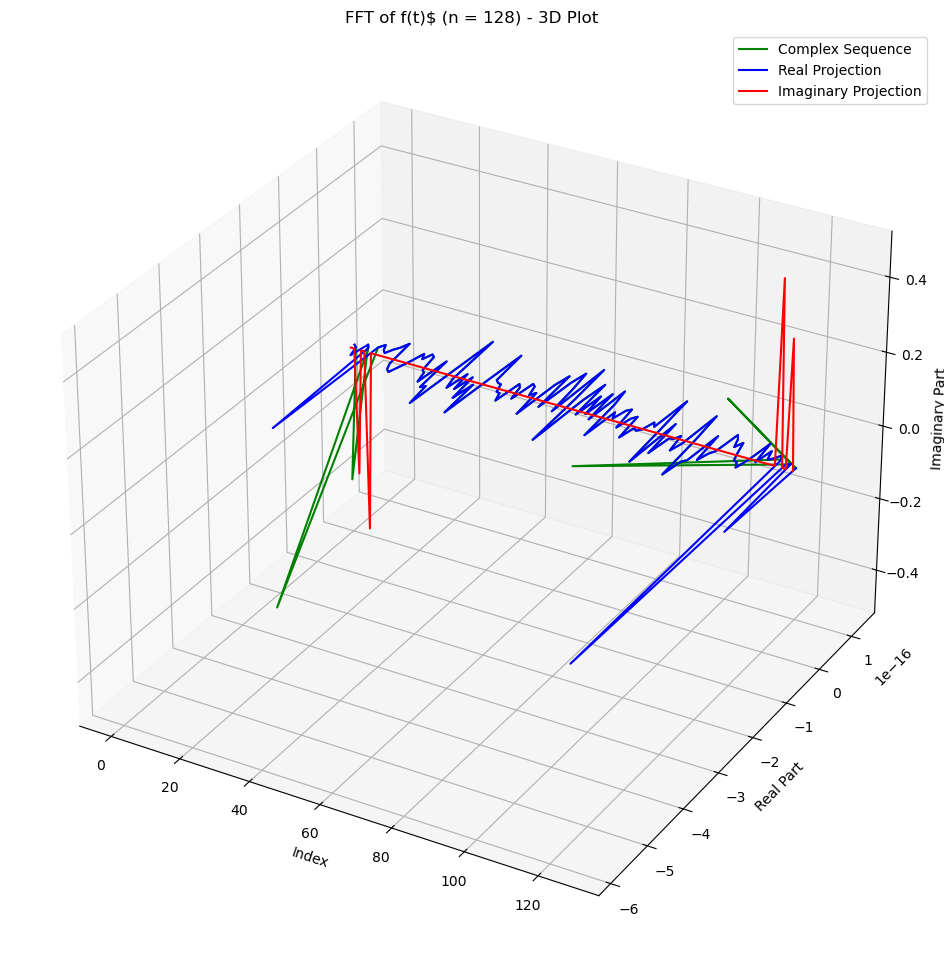

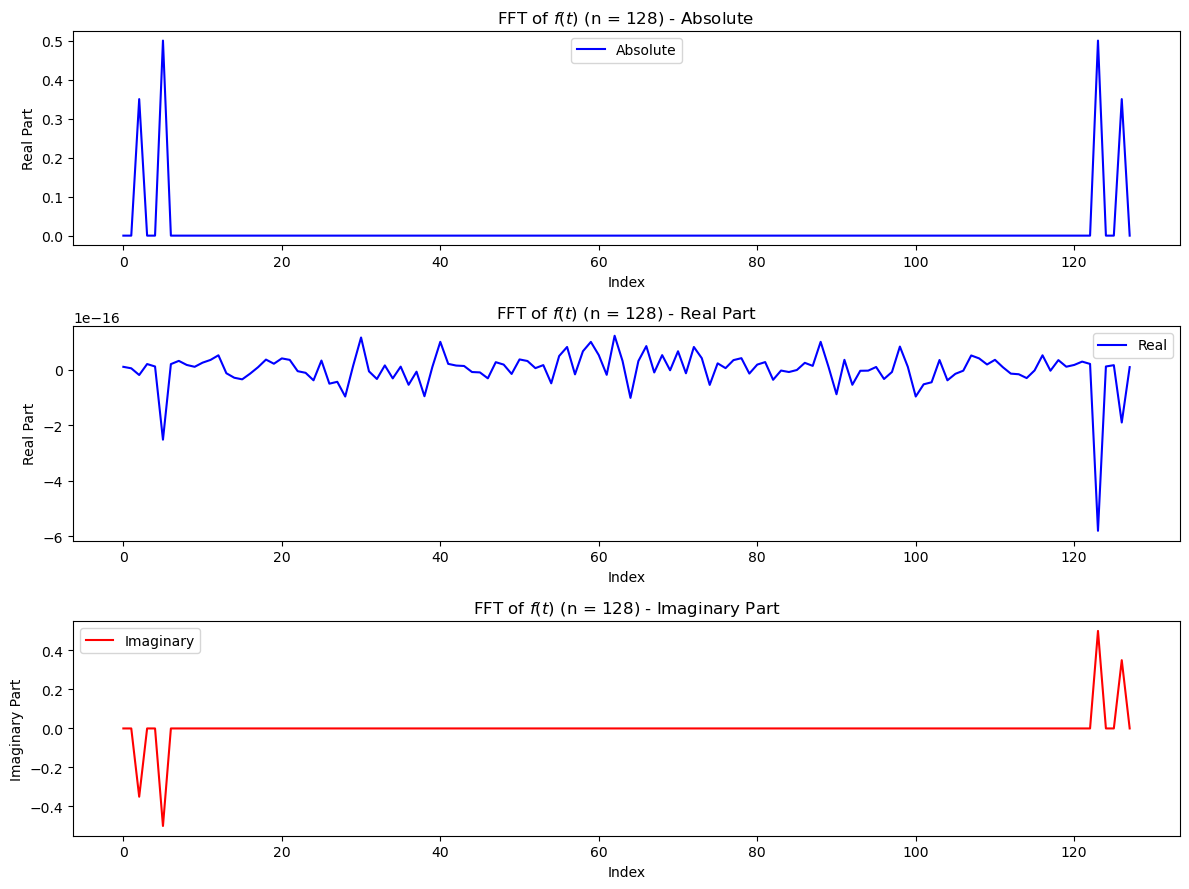

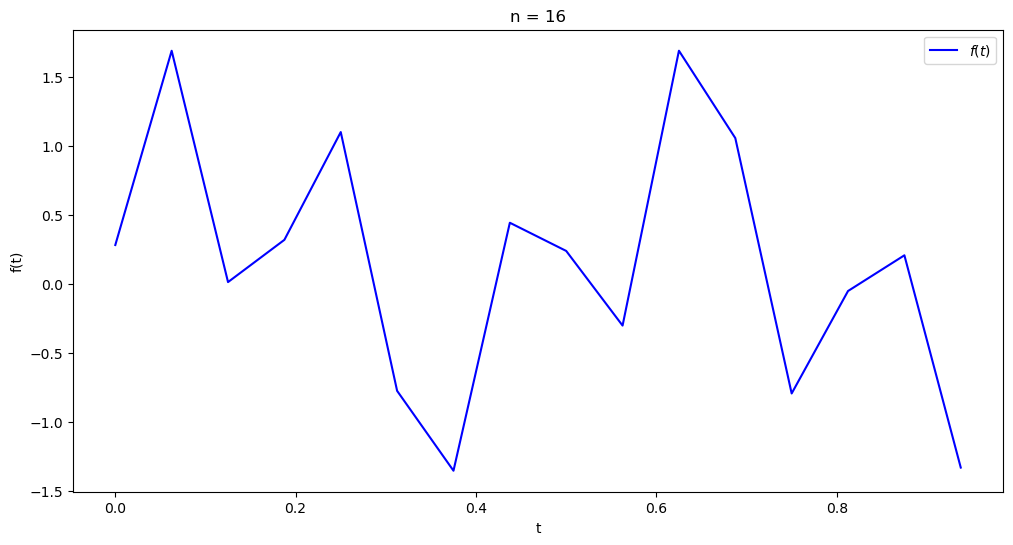

G's sequence:
[(0.1510750134365501, 0.0), (0.009788108177290892, 0.018981332035918615), (0.011179188488006354, -0.3759681774046662), (0.0137809613485456, 0.009093483862493645), (0.016916156875233616, -0.0045449552508091545), (0.0017928280016042235, -0.5138416364055105), (0.015597822726836932, -0.01979590827448402), (-0.014641349871363526, -0.030404100107900338), (0.020895065289426626, 0.0), (-0.01464134987136354, 0.030404100107900348), (0.015597822726836925, 0.01979590827448402), (0.0017928280016041402, 0.5138416364055105), (0.016916156875233616, 0.0045449552508091545), (0.013780961348545572, -0.00909348386249359), (0.011179188488006305, 0.3759681774046662), (0.009788108177290878, -0.01898133203591868)]


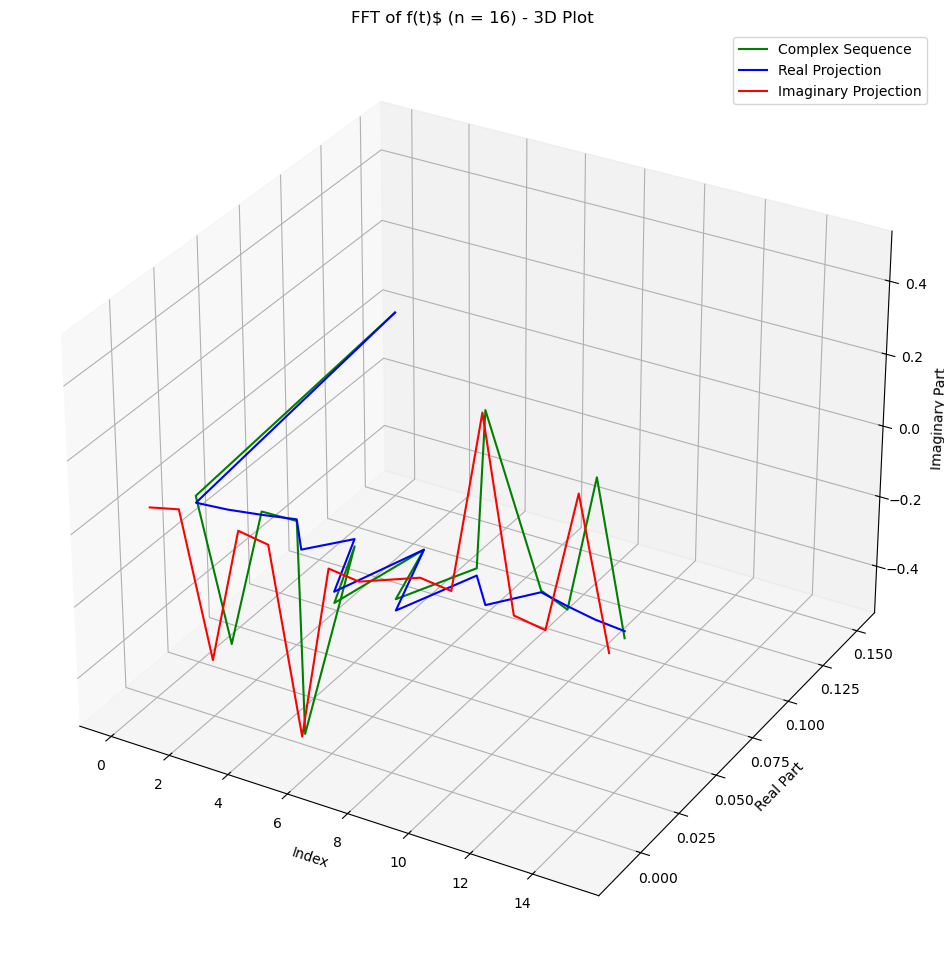

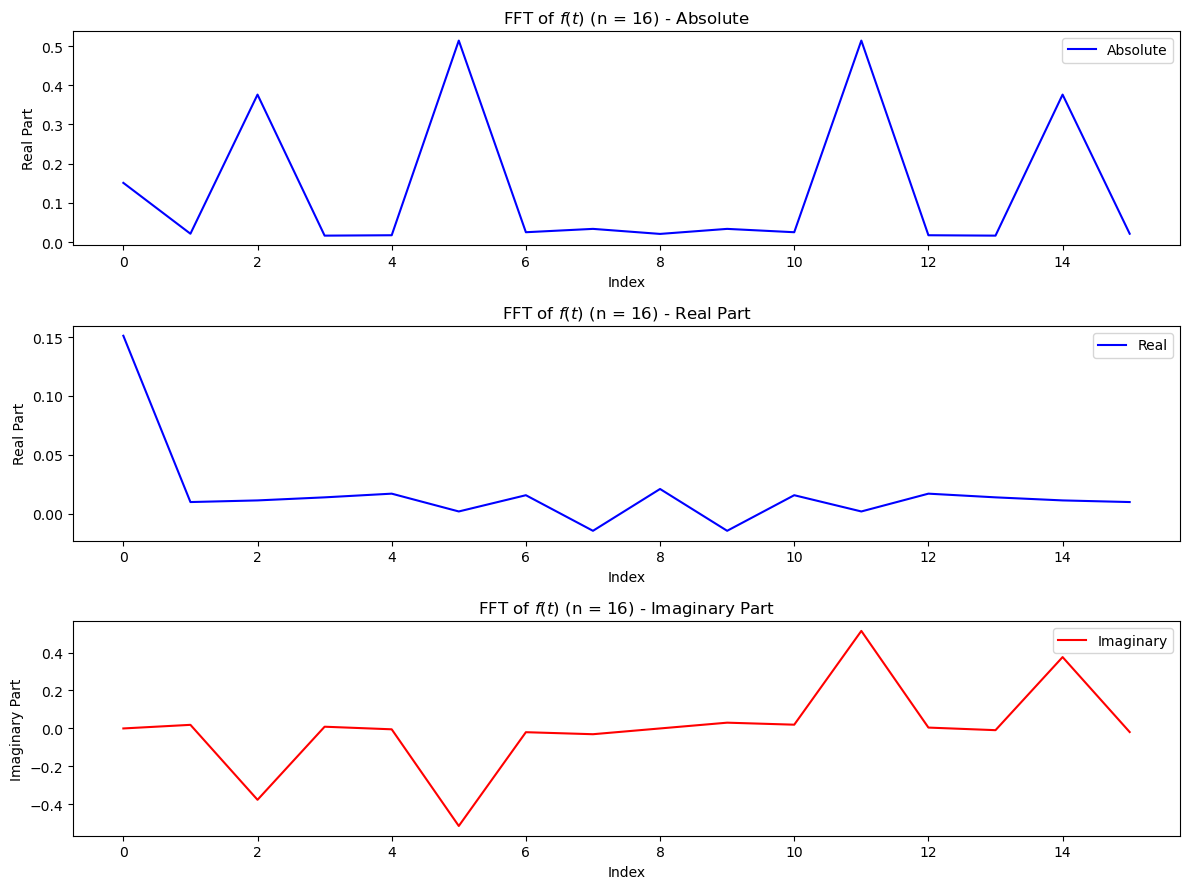

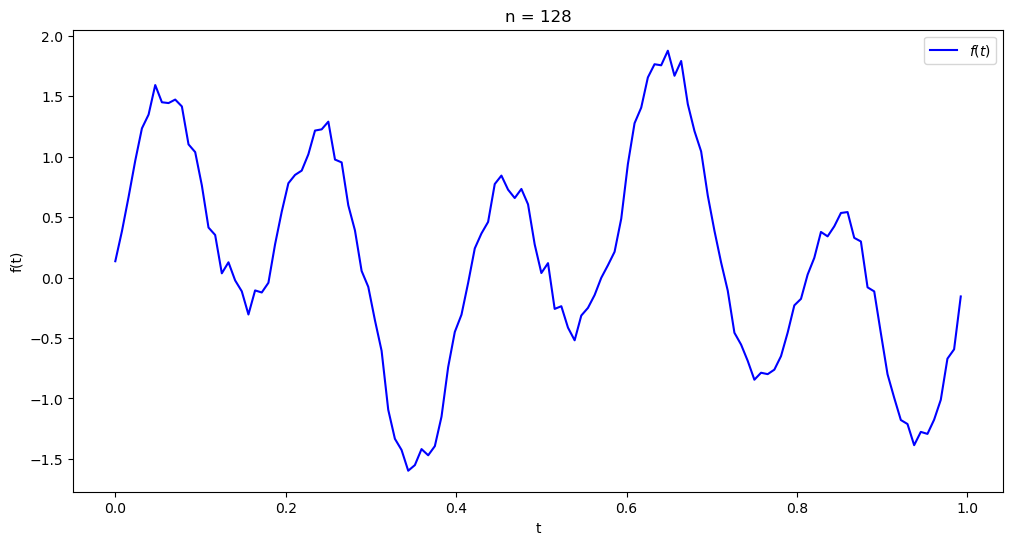

G's sequence:
[(0.14738996432459686, 0.0), (-0.011127559379616571, 0.006546434577601814), (-0.004620671806945085, -0.353552325781216), (-0.01282260048327038, 0.003360315194378041), (0.0006700095151345555, -0.0034495285927334312), (0.0038775251222619355, -0.5008712361729241), (-0.00495579422746162, 0.0012138908410666161), (0.00347354135261712, -0.0022570146878976237), (0.007824640912268841, -0.002986849245697102), (0.0058854993910005165, 0.008319100877642906), (-0.0017725180516991999, 0.0030392130528614694), (-0.004095609126200543, -0.0015257140478594), (-0.01059558684725889, 0.007477296400016926), (0.0031104364977758087, -0.006524704657151104), (-0.0009015638004404082, 0.0030648549008122526), (0.003167230469524353, -0.006489160103582546), (0.0074567472185610205, 0.0001430651370912335), (-0.006848098768432558, -0.0053035232087606686), (-0.007454138161260411, -0.0019142384149060314), (-0.004225576446532073, 0.01875090487029874), (0.011420294074587254, -0.00297269084527493), (0.0018591623

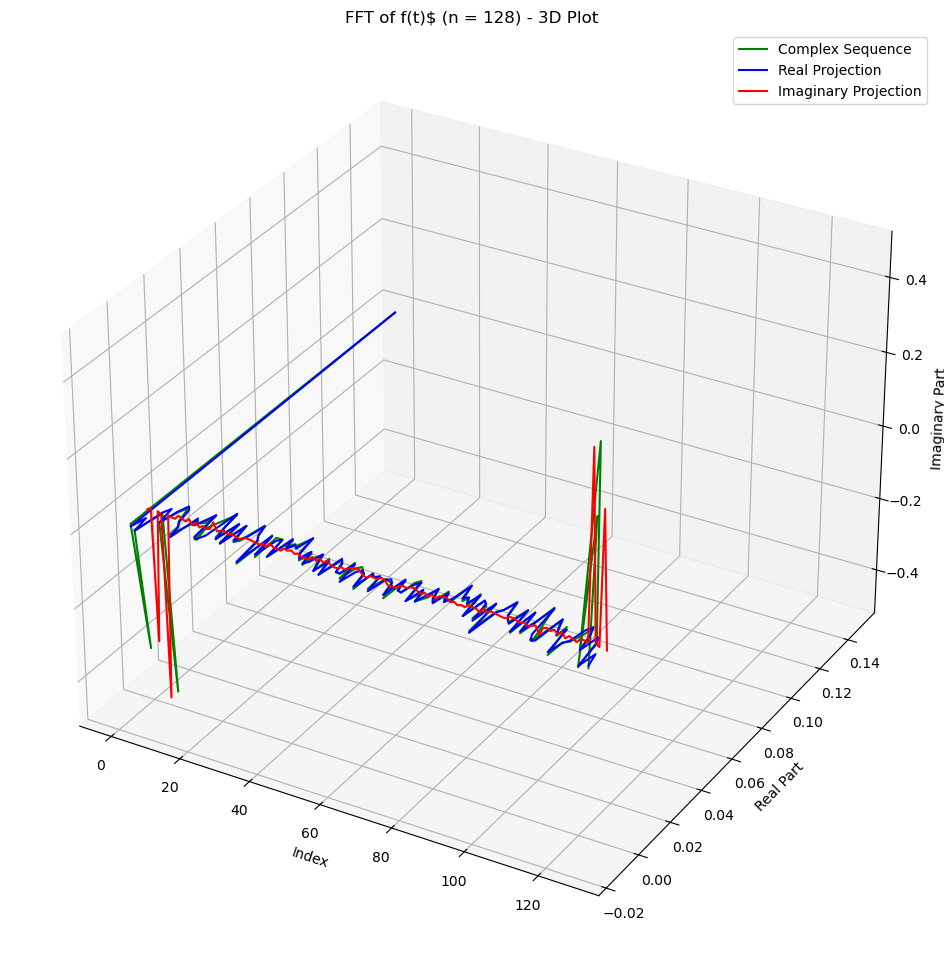

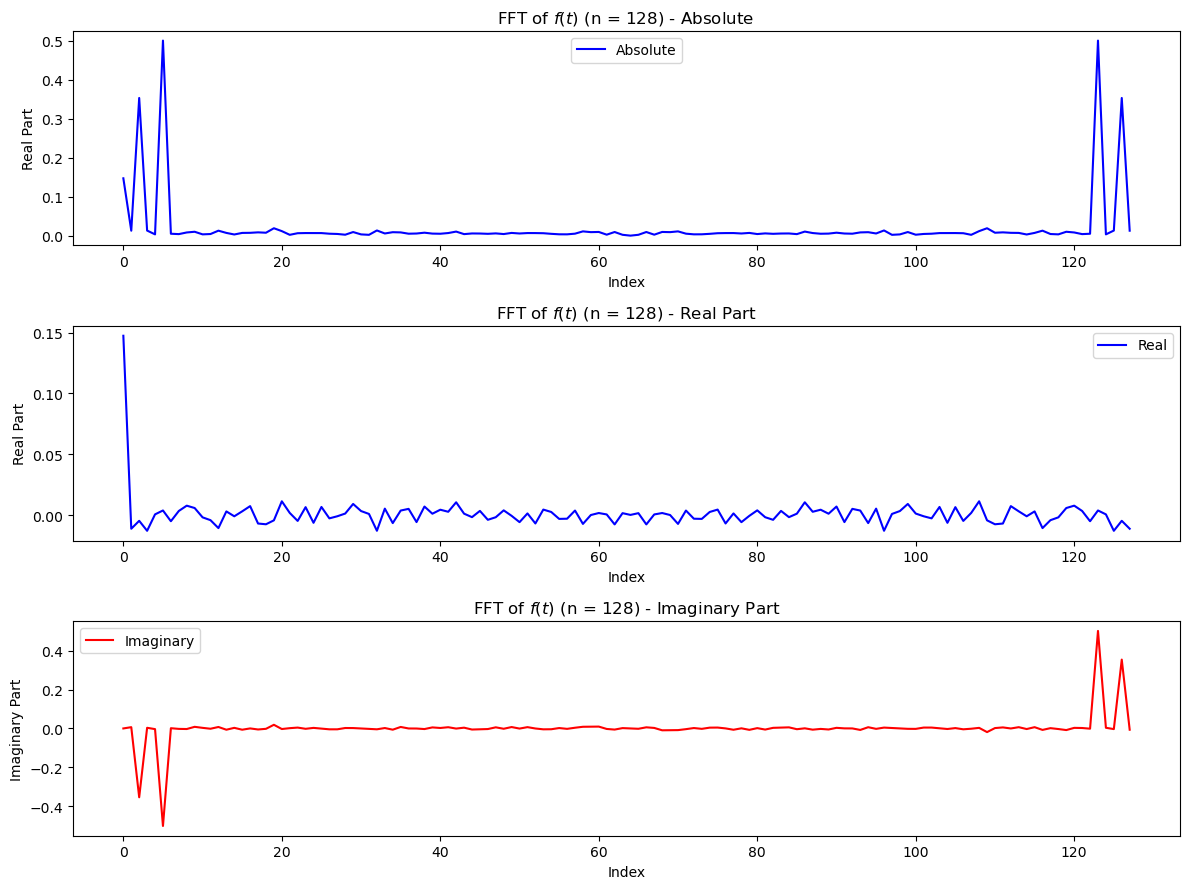

In [12]:
# 第一部，计算FFT并实现简单的可视化
for F in F_instances:
    F.plot_func()
    F.fft_plot()

In [19]:
for F in F_instances:
    print('F:', F.F)
    print('iF: ', F.iF)

F: [(-1.528566885207725e-16+0j), (4.4923612769336096e-17+1.0607355844918418e-17j), (1.2153693932024152e-16-0.3500000000000001j), (7.581370698702926e-17+1.3877787807814457e-16j), (-2.0102263481347252e-19+1.1102230246251565e-16j), (-2.697006910268047e-16-0.5j), (-5.255004555079618e-17-8.326672684688674e-17j), (1.231553076667411e-16-2.0292841752753525e-16j), (3.1898809694491904e-16+0j), (1.0956439556777732e-16+2.391928246957418e-16j), (-7.275208998916087e-17+1.1102230246251565e-16j), (-3.6827550286303336e-16+0.5000000000000001j), (-2.0102263481345894e-19-1.1102230246251565e-16j), (3.5610640745113326e-17-1.942890293094024e-16j), (5.847225691171948e-17+0.3500000000000001j), (2.8472106307317376e-17-4.687176301312498e-17j)]
iF:  [(-2.465190328815662e-32+0j), (1.4188542793418697+0j), (-0.007106781186547284+5.5511151231257815e-17j), (0.11229131446549295+2.220446049250313e-16j), (1-1.232595164407831e-32j), (-0.8776581791956731-2.220446049250313e-16j), (-1.4071067811865485+5.551115123125784e-17j)

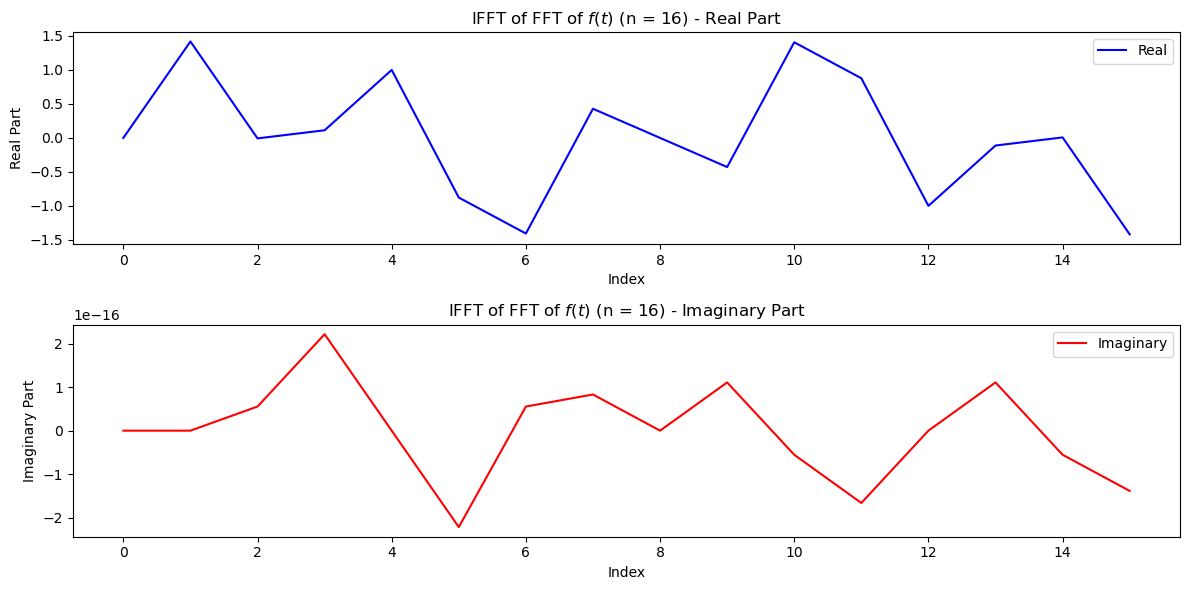

max absolute error: 2.220446049250313e-16
Inverse FFT result is close to original function.


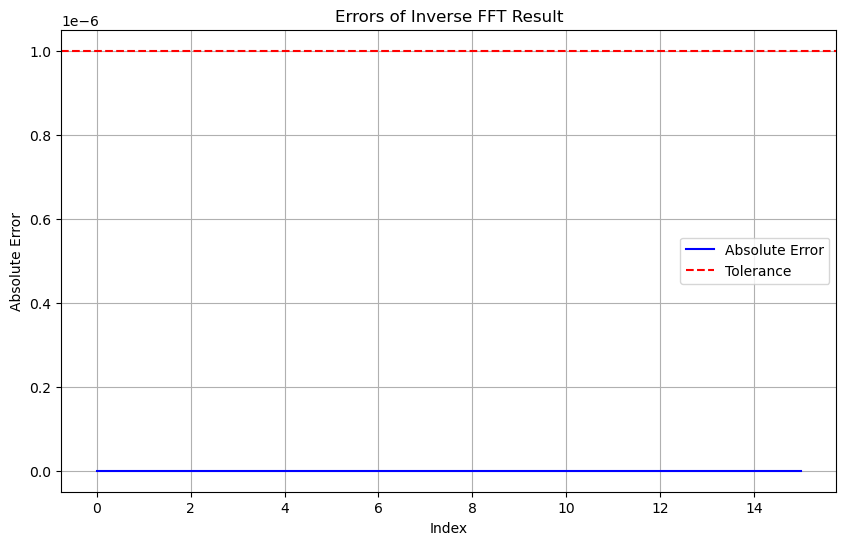

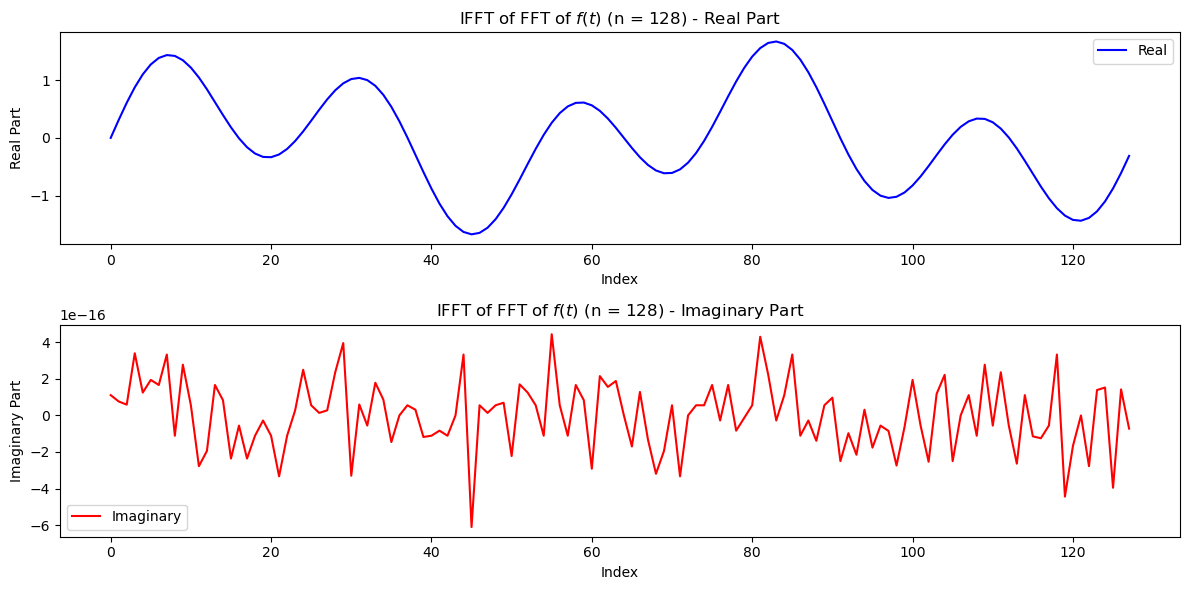

max absolute error: 4.440892098500626e-16
Inverse FFT result is close to original function.


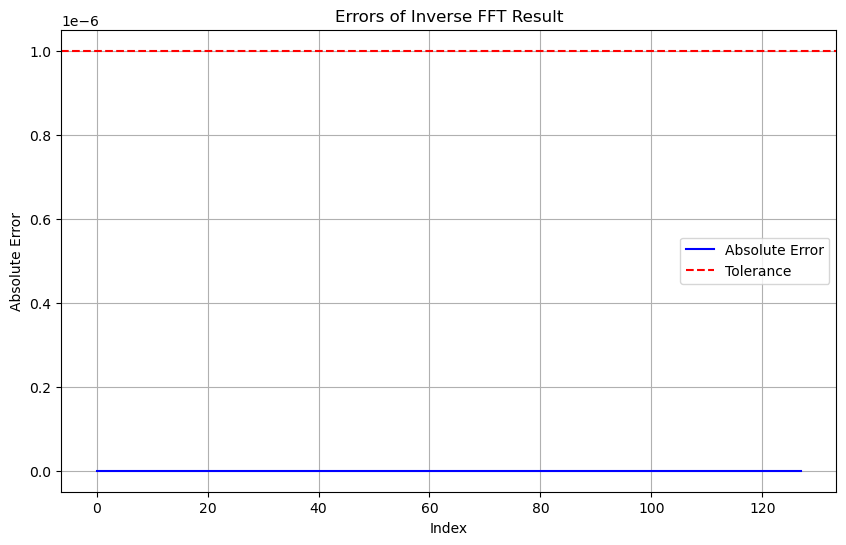

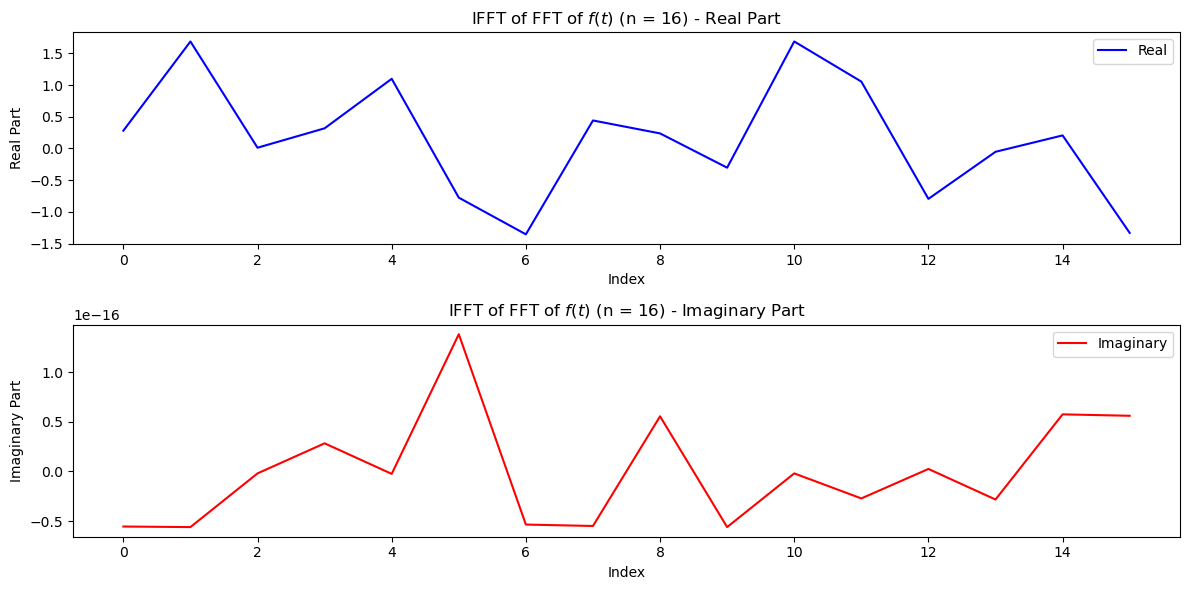

max absolute error: 2.220446049250313e-16
Inverse FFT result is close to original function.


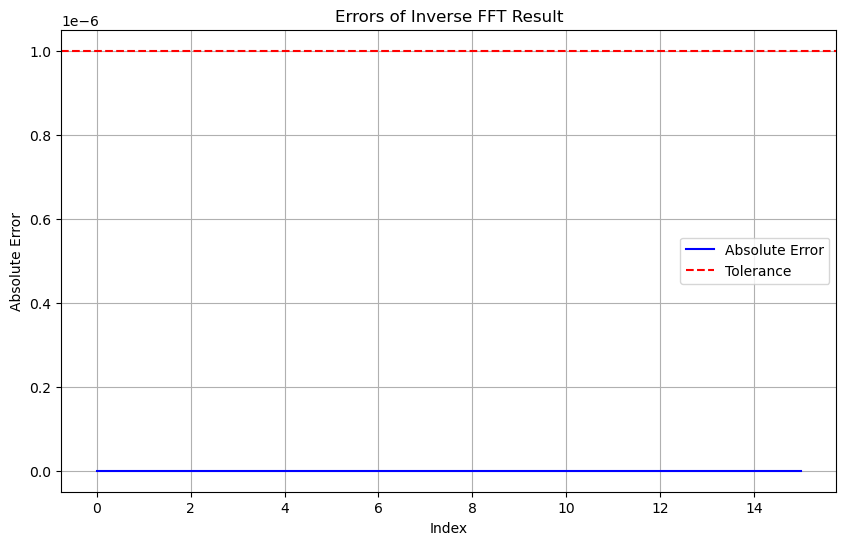

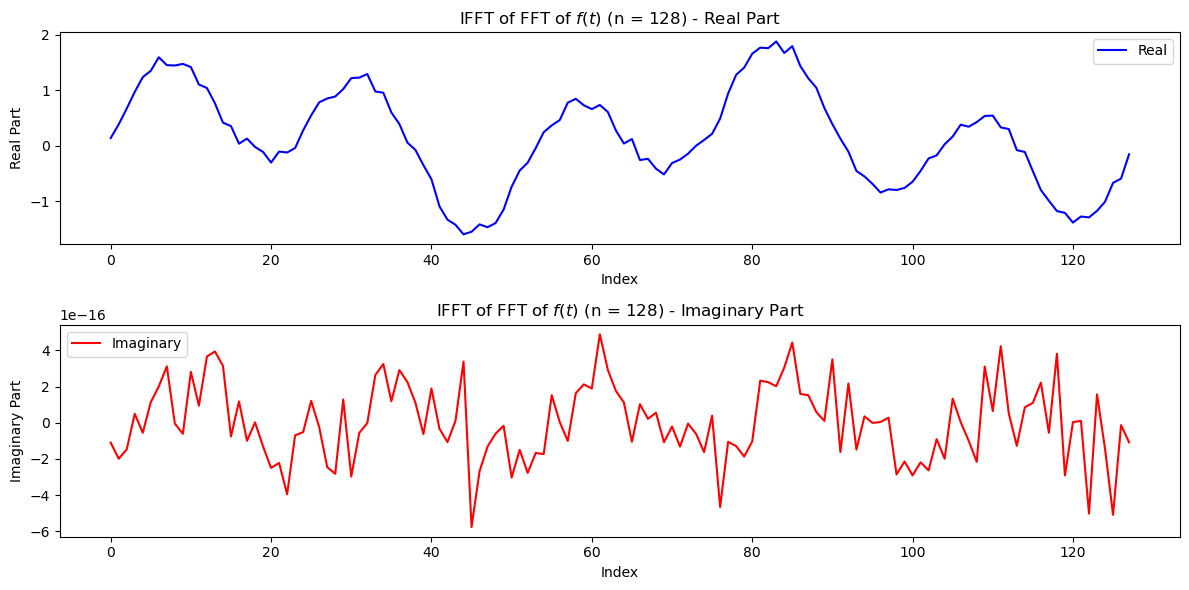

max absolute error: 4.996003610813204e-16
Inverse FFT result is close to original function.


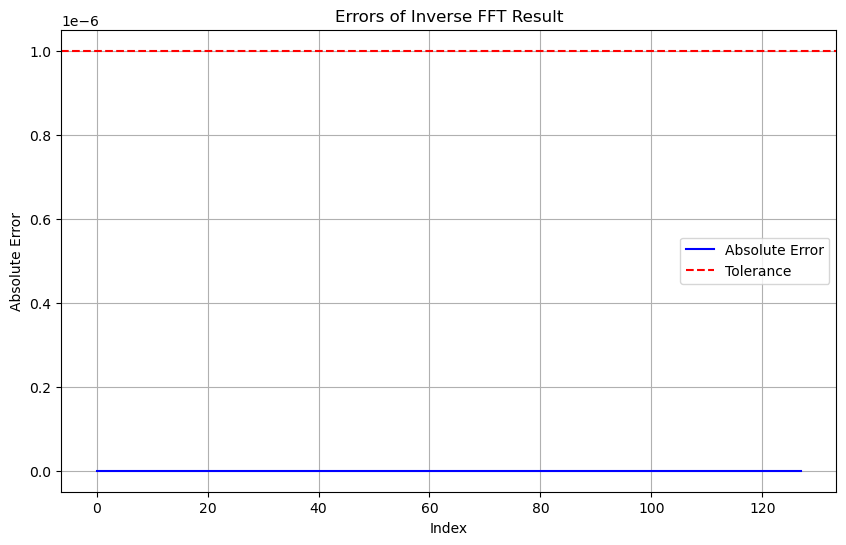

In [13]:
for F in F_instances:
    F.ifft_plot()
    F.plot_errors()

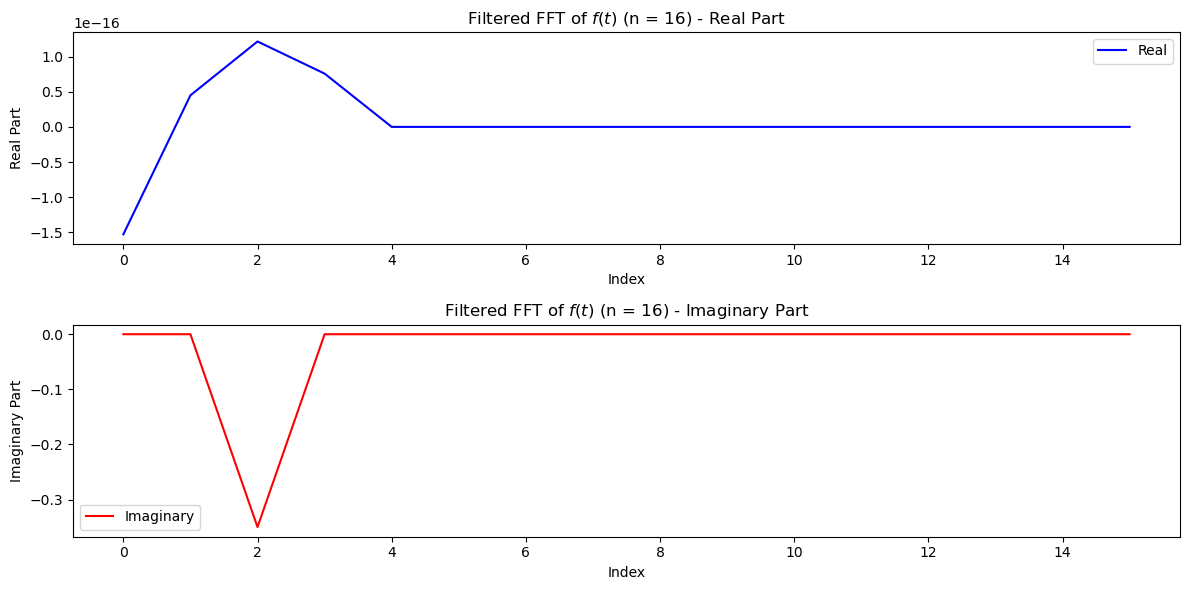

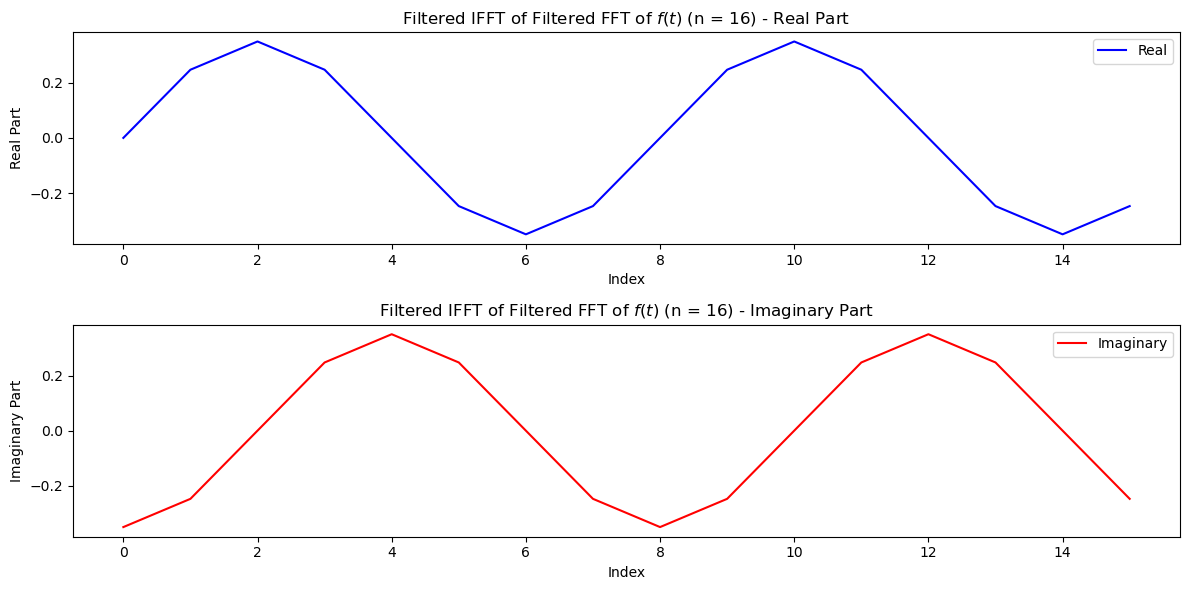

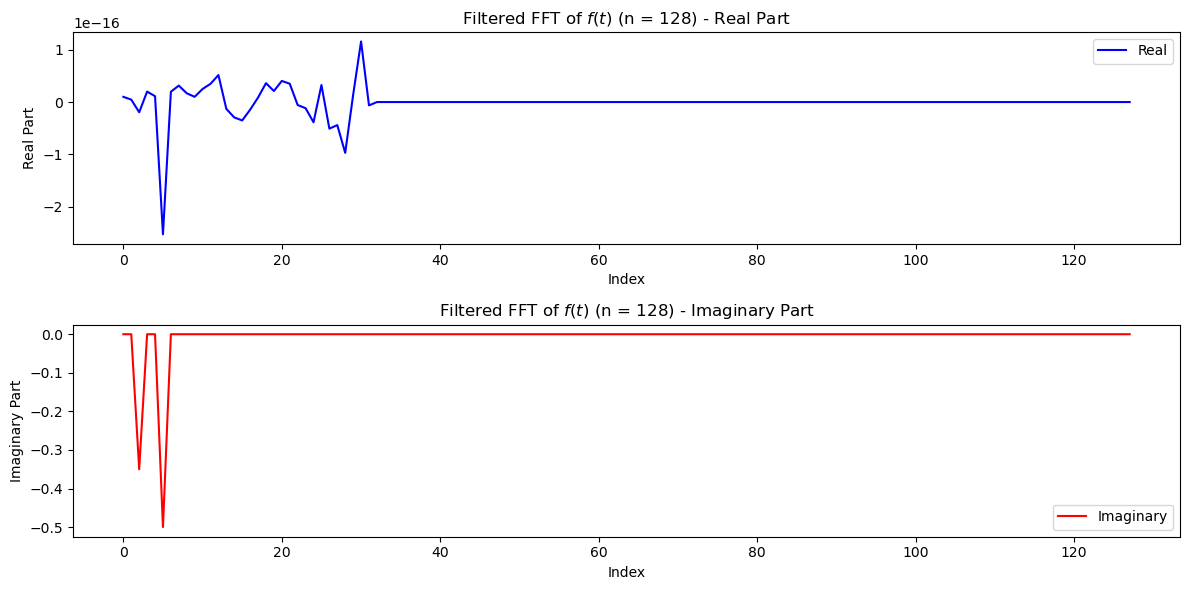

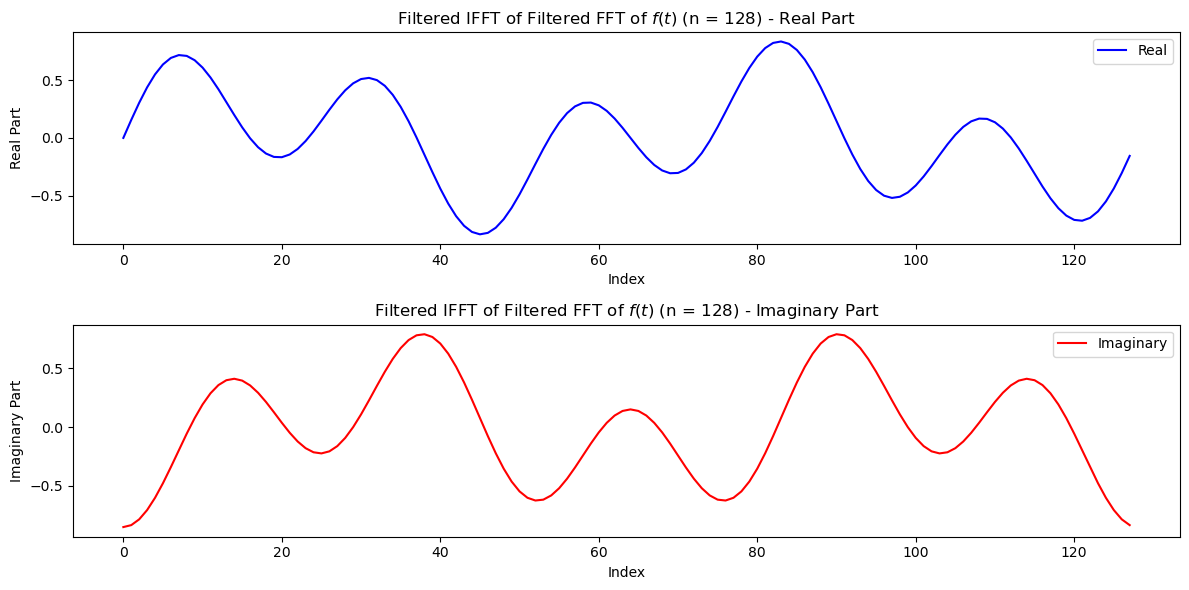

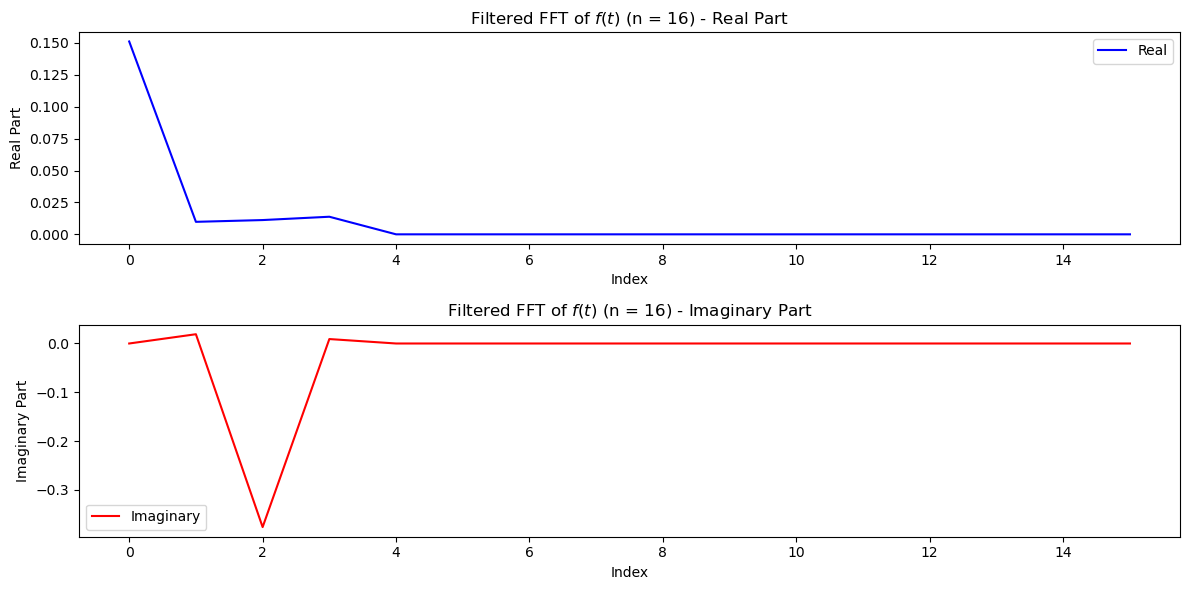

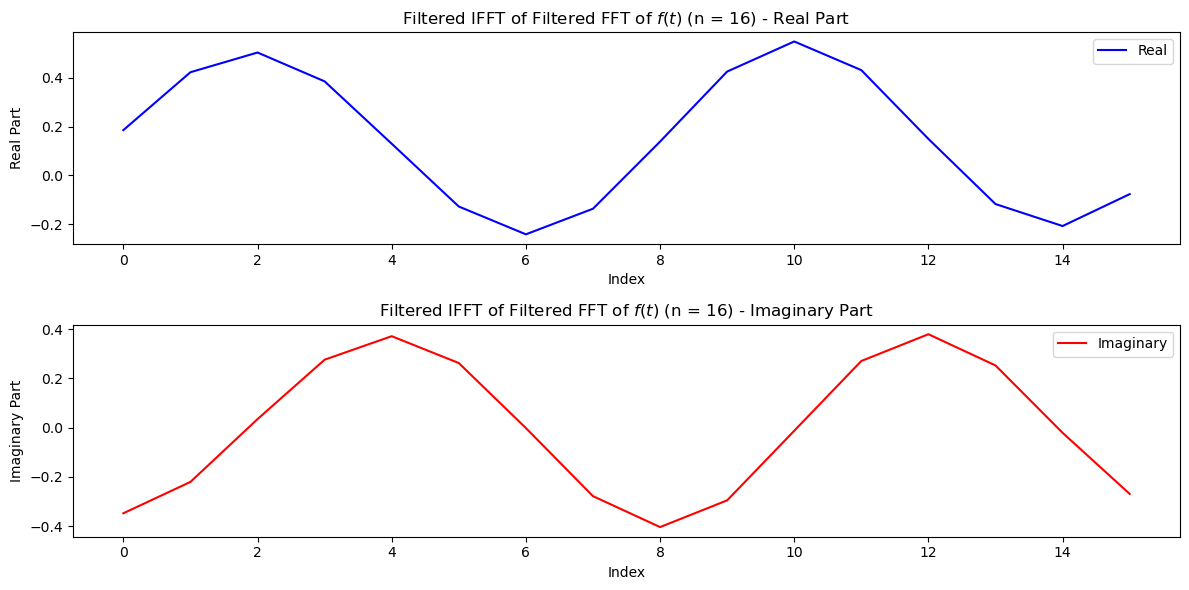

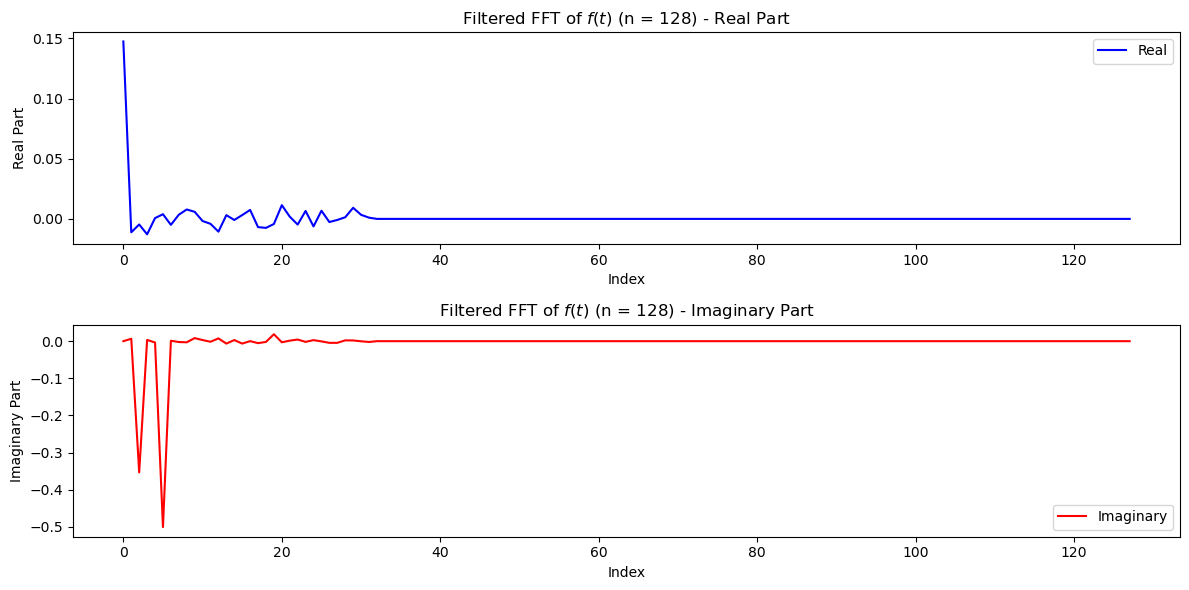

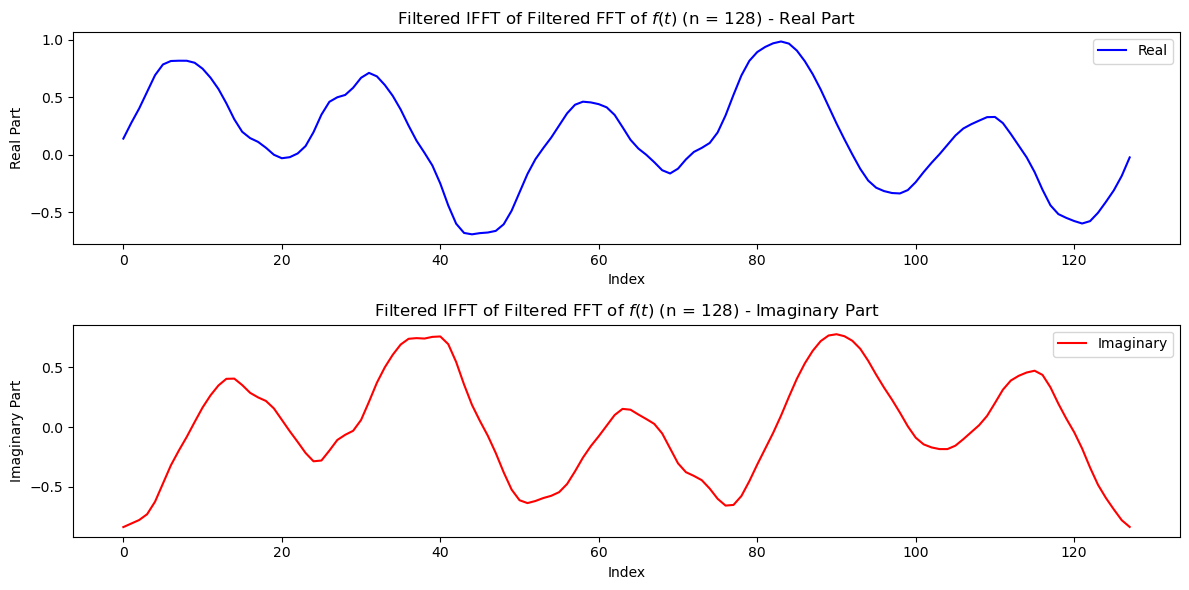

In [14]:
for F in F_instances:
    F.low_pass_filter_and_plot()
    F.plot_filtered_ifft()

In [80]:
# # 绘制折线图
# plt.figure(figsize=(12, 6))

# plt.subplot(2, 1, 1)
# plt.plot(t1, f1_values1, label='$f_1(t)$', color='blue')
# plt.plot(t1, f2_values1, label='$f_2(t)$', color='red', linestyle='dashed')
# plt.title('n = 2^4')
# plt.xlabel('t')
# plt.ylabel('f(t)')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(t2, f1_values2, label='$f_1(t)$', color='blue')
# plt.plot(t2, f2_values2, label='$f_2(t)$', color='red', linestyle='dashed')
# plt.title('n = 2^7')
# plt.xlabel('t')
# plt.ylabel('f(t)')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [79]:
# n_values = [n1, n2]


# for n in n_values:
#     # 生成 t 的值
#     t = np.linspace(0, 1, n, endpoint=False)

#     # 计算 f1(t) 和 f2(t) 的值
#     f1_values = f1(t)
#     f2_values = f2(t)

#     # 进行FFT变换
#     F1 = fft(f1_values)
#     F2 = fft(f2_values)

#     # 绘制FFT结果的实部和虚部
#     plt.figure(figsize=(12, 6))

#     plt.subplot(2, 2, 1)
#     plt.plot(np.real(F1), label='Real', color='blue')
#     plt.title('FFT of f1(t) (n = {}) - Real Part'.format(n))
#     plt.xlabel('Index')
#     plt.ylabel('Real Part')
#     plt.legend()

#     plt.subplot(2, 2, 2)
#     plt.plot(np.imag(F1), label='Imaginary', color='red')
#     plt.title('FFT of f1(t) (n = {}) - Imaginary Part'.format(n))
#     plt.xlabel('Index')
#     plt.ylabel('Imaginary Part')
#     plt.legend()

#     plt.subplot(2, 2, 3)
#     plt.plot(np.real(F2), label='Real', color='blue')
#     plt.title('FFT of f2(t) (n = {}) - Real Part'.format(n))
#     plt.xlabel('Index')
#     plt.ylabel('Real Part')
#     plt.legend()

#     plt.subplot(2, 2, 4)
#     plt.plot(np.imag(F2), label='Imaginary', color='red')
#     plt.title('FFT of f2(t) (n = {}) - Imaginary Part'.format(n))
#     plt.xlabel('Index')
#     plt.ylabel('Imaginary Part')
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig('fft_n_{}.png'.format(n))
#     plt.show()